In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ziya07_ai_powered_music_recommendation_system_path = kagglehub.dataset_download('ziya07/ai-powered-music-recommendation-system')

print('Data source import complete.')


Data source import complete.


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# About Dataset
This dataset is designed for an AI-powered music recommendation system that personalizes song suggestions based on user sentiment analysis. It contains user-generated text, detected emotions, and corresponding music recommendations with relevant song attributes. The dataset can be used for sentiment classification, music recommendation modeling, and NLP-based emotion recognition.

## Key Features:
* User_ID: Unique identifier for each user.
* User_Text: Text input from the user expressing their emotions.
* Sentiment_Label: Classified sentiment (Happy, Sad, Relaxed, Motivated).
* Recommended_Song_ID: Unique identifier for the recommended song.
* Song_Name: Name of the recommended song.
* Artist: Music artist of the recommended song.
* Genre: Genre classification of the song.
* Tempo (BPM): Beats per minute (BPM) of the song.
* Mood: Emotional tone of the song (e.g., Joyful, Melancholic, Soothing).
* Energy: Level of energy in the song (Low, Medium, High).
* Danceability: Suitability of the song for dancing (Low, Medium, High).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-powered-music-recommendation-system/music_sentiment_dataset.csv


# Load the dataset

In [ ]:
print(ziya07_ai_powered_music_recommendation_system_path)

/kaggle/input/ai-powered-music-recommendation-system


In [ ]:
cd /root/.cache/kagglehub/datasets/ziya07/ai-powered-music-recommendation-system/versions/1

/root/.cache/kagglehub/datasets/ziya07/ai-powered-music-recommendation-system/versions/1


In [ ]:
ls

bert_embeddings_with_sentiment.csv  music_sentiment_dataset.csv


In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/ziya07/ai-powered-music-recommendation-system/versions/1/music_sentiment_dataset.csv")

# Data Preparation

## Check for missing values

In [ ]:
df.dropna(inplace=True)

## Text cleaning function

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

## Apply text cleaning

In [ ]:
df['Cleaned_Text'] = df['User_Text'].apply(clean_text)

## Display basic dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   User_Text            1000 non-null   object
 2   Sentiment_Label      1000 non-null   object
 3   Recommended_Song_ID  1000 non-null   object
 4   Song_Name            1000 non-null   object
 5   Artist               1000 non-null   object
 6   Genre                1000 non-null   object
 7   Tempo (BPM)          1000 non-null   int64 
 8   Mood                 1000 non-null   object
 9   Energy               1000 non-null   object
 10  Danceability         1000 non-null   object
 11  Cleaned_Text         1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [ ]:
df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability,Cleaned_Text
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low,way ball purpose public experience recently re...
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High,save officer two
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,decade ahead everyone environment action health
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High,best change letter citizen try ask quality pro...
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High,worker player chance kind actually


## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Sentiment_Label'], random_state=42)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)

Train size: (800, 12)
Test size: (200, 12)


# Data Visualization

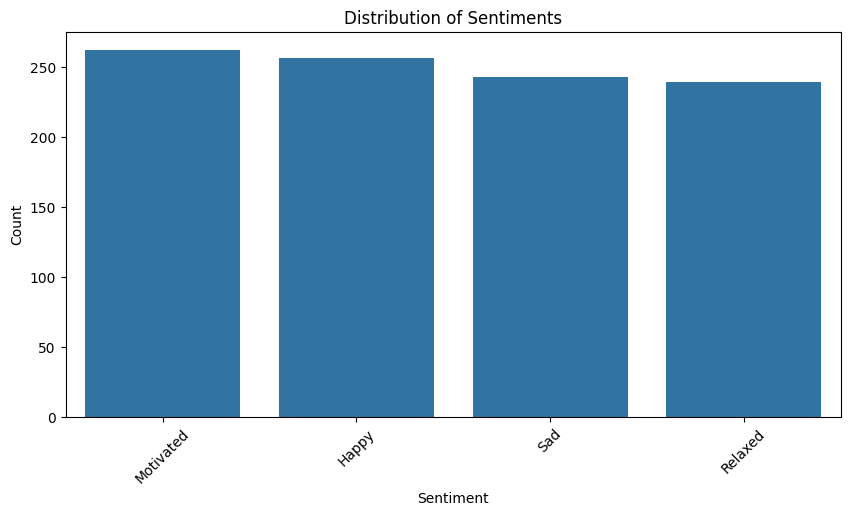

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment_Label', data=df, order=df['Sentiment_Label'].value_counts().index)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

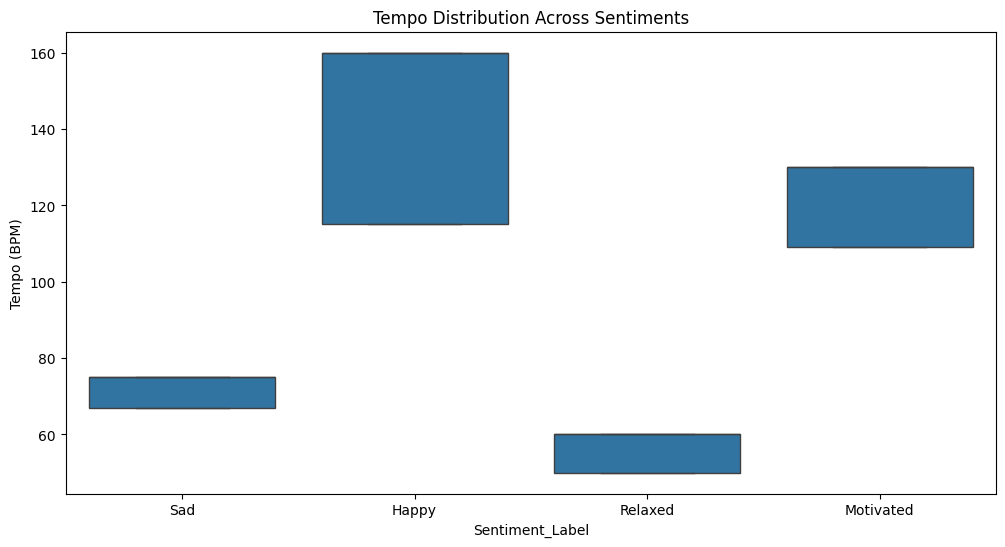

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sentiment_Label', y='Tempo (BPM)', data=df)
plt.title("Tempo Distribution Across Sentiments")
plt.show()


# Load Pre-trained BERT Model & Tokenizer

In [ ]:
from transformers import RobertaTokenizer, RobertaModel

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the [CLS] token embedding as sentence embedding
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.squeeze().numpy()

In [ ]:
import torch

embeddings = []

for text in df['Cleaned_Text']:
    embedding = get_bert_embedding(text)
    embeddings.append(embedding)

In [ ]:
import numpy as np

embeddings_df = pd.DataFrame(embeddings)
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.033476,0.055190,-0.011612,-0.078538,0.067072,-0.091362,-0.049897,0.035508,0.018319,-0.062588,...,0.025464,-0.010985,-0.103883,-0.077627,-0.038526,0.079793,0.110989,-0.080255,-0.050463,-0.025097
1,-0.065504,0.070989,0.007230,-0.107233,0.077324,-0.093023,-0.026177,0.011081,0.065543,-0.045553,...,0.009632,-0.005586,-0.109443,-0.107570,0.035195,0.109784,0.121137,-0.016247,-0.067654,-0.009390
2,-0.027215,0.076126,-0.013085,-0.100887,0.077185,-0.124792,-0.032320,0.012172,0.056388,-0.051769,...,-0.004977,-0.005150,-0.113835,-0.043313,0.000946,0.086875,0.127908,-0.059928,-0.062377,-0.014268
3,-0.046191,0.076614,-0.000987,-0.080648,0.057536,-0.118283,-0.043987,-0.004656,0.030809,-0.057678,...,0.045956,-0.004869,-0.122258,-0.067153,-0.008777,0.083360,0.108546,-0.060330,-0.072538,0.032683
4,-0.055925,0.089532,-0.004548,-0.094638,0.077284,-0.053717,-0.026845,0.042791,0.047426,-0.055081,...,0.034945,0.018862,-0.134070,-0.081012,-0.019177,0.109027,0.091058,-0.051929,-0.046393,0.006008


In [ ]:
final_df = pd.concat([embeddings_df, df['Sentiment_Label']], axis=1)
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Sentiment_Label
0,-0.033476,0.055190,-0.011612,-0.078538,0.067072,-0.091362,-0.049897,0.035508,0.018319,-0.062588,...,-0.010985,-0.103883,-0.077627,-0.038526,0.079793,0.110989,-0.080255,-0.050463,-0.025097,Sad
1,-0.065504,0.070989,0.007230,-0.107233,0.077324,-0.093023,-0.026177,0.011081,0.065543,-0.045553,...,-0.005586,-0.109443,-0.107570,0.035195,0.109784,0.121137,-0.016247,-0.067654,-0.009390,Happy
2,-0.027215,0.076126,-0.013085,-0.100887,0.077185,-0.124792,-0.032320,0.012172,0.056388,-0.051769,...,-0.005150,-0.113835,-0.043313,0.000946,0.086875,0.127908,-0.059928,-0.062377,-0.014268,Relaxed
3,-0.046191,0.076614,-0.000987,-0.080648,0.057536,-0.118283,-0.043987,-0.004656,0.030809,-0.057678,...,-0.004869,-0.122258,-0.067153,-0.008777,0.083360,0.108546,-0.060330,-0.072538,0.032683,Happy
4,-0.055925,0.089532,-0.004548,-0.094638,0.077284,-0.053717,-0.026845,0.042791,0.047426,-0.055081,...,0.018862,-0.134070,-0.081012,-0.019177,0.109027,0.091058,-0.051929,-0.046393,0.006008,Happy


In [ ]:
final_df.to_csv('bert_embeddings_with_sentiment.csv', index=False)

#Build Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Separate features (X) and labels (y)
X = final_df.iloc[:, :-1].values  # BERT embeddings (768 dims)
y = final_df['Sentiment_Label'].values  # Sentiment labels


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
svm_model = SVC(C=1, gamma=0.01, kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', gamma=0.01, kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[21 11 12  7]
 [20 13 11  8]
 [19 10  9 10]
 [ 8 15 11 15]]

Classification Report:
               precision    recall  f1-score   support

       Happy       0.31      0.41      0.35        51
   Motivated       0.27      0.25      0.26        52
     Relaxed       0.21      0.19      0.20        48
         Sad       0.38      0.31      0.34        49

    accuracy                           0.29       200
   macro avg       0.29      0.29      0.29       200
weighted avg       0.29      0.29      0.29       200


Accuracy Score: 0.29


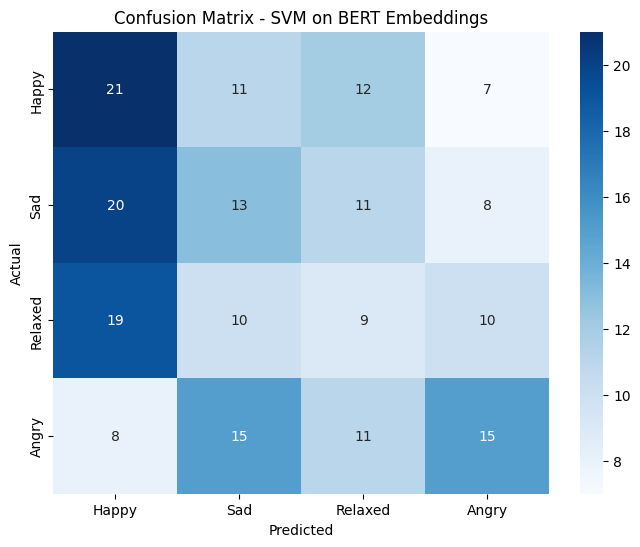

In [ ]:
# Example of your class labels
class_names = ['Happy', 'Sad', 'Relaxed', 'Angry']  # Replace with your actual labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM on BERT Embeddings')
plt.show()

#Fine-Tuning RoBERTa

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['Sentiment_Label'])

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Convert to Hugging Face Dataset format
dataset = DatasetDict({
    'train': Dataset.from_pandas(train_df[['Cleaned_Text', 'label']]),
    'test': Dataset.from_pandas(test_df[['Cleaned_Text', 'label']])
})

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['Cleaned_Text'], padding='max_length', truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(le.classes_))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

In [ ]:
!pip install --upgrade transformers


In [ ]:
import transformers
print(transformers.__version__)


4.51.3


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    logging_steps=10,
    report_to=[]  # <==== disables wandb, tensorboard, etc.
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.401400,1.388422,0.255000,0.065025,0.255000,0.103625
2,1.389400,1.387449,0.255000,0.065025,0.255000,0.103625
3,1.385600,1.386248,0.255000,0.065025,0.255000,0.103625


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=150, training_loss=1.394912198384603, metrics={'train_runtime': 4002.3738, 'train_samples_per_second': 0.6, 'train_steps_per_second': 0.037, 'total_flos': 157869468057600.0, 'train_loss': 1.394912198384603, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(results)

model.save_pretrained('./roberta-finetuned-emotion')
tokenizer.save_pretrained('./roberta-finetuned-emotion')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 1.388421893119812, 'eval_accuracy': 0.255, 'eval_precision': 0.065025, 'eval_recall': 0.255, 'eval_f1': 0.10362549800796814, 'eval_runtime': 86.1088, 'eval_samples_per_second': 2.323, 'eval_steps_per_second': 0.081, 'epoch': 3.0}


('./roberta-finetuned-emotion/tokenizer_config.json',
 './roberta-finetuned-emotion/special_tokens_map.json',
 './roberta-finetuned-emotion/vocab.json',
 './roberta-finetuned-emotion/merges.txt',
 './roberta-finetuned-emotion/added_tokens.json')